In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rice=pd.read_csv("C:/Users/ankit/Downloads/wb_rice_production.csv")


Text(0.5, 1.0, 'Line Diagram showing Rice Production')

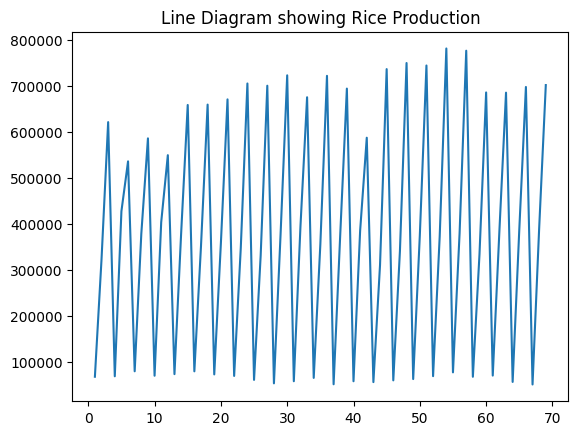

In [3]:
plt.plot(rice['Rounds'],rice['W_Production'])
plt.title("Line Diagram showing Rice Production")

Text(0, 0.5, 'Production')

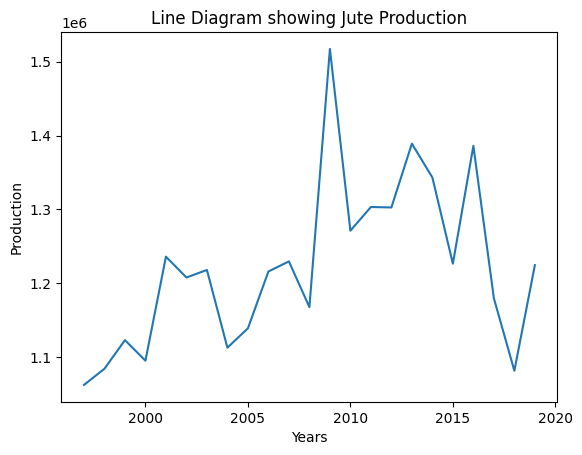

In [10]:

jute=pd.read_csv("C:/Users/ankit/Downloads/wb_jute_production.csv")
jute['years']=range(1997,2020)
jute
plt.plot(jute['years'],jute['weighted_mean_production'])
plt.title("Line Diagram showing Jute Production")
plt.xlabel("Years")
plt.ylabel("Production")



In [ ]:
diff1=

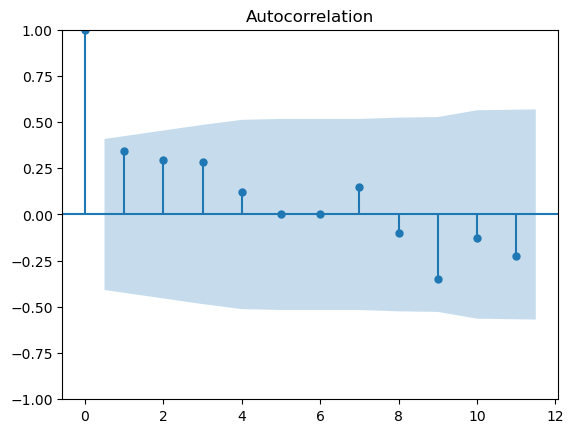

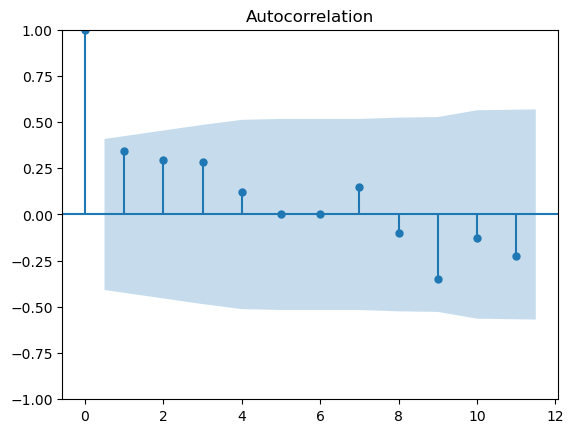

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(jute['weighted_mean_production'])

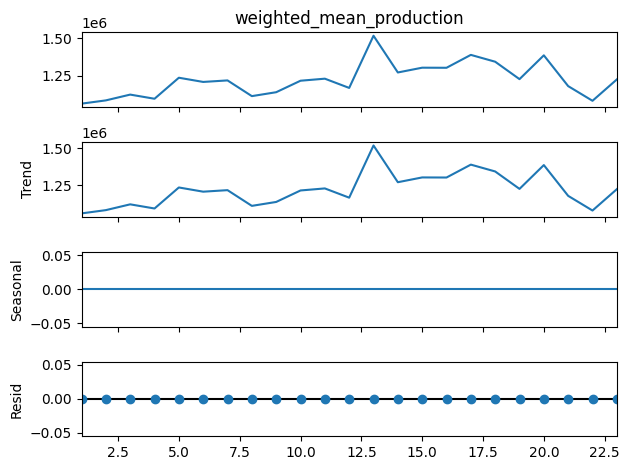

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a DataFrame `df` with a 'Year' column and a 'Production' column:
# Example:
# df = pd.DataFrame({
#     'Year': range(2000, 2024),
#     'Production': [values...]
# })

# Set 'Year' as index and convert to time series
jute.set_index('Round', inplace=True)
ts = jute['weighted_mean_production']

# Since it's yearly data, set frequency to 1 (no real seasonality)
decomposition = seasonal_decompose(ts, model='additive', period=1)

# Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()


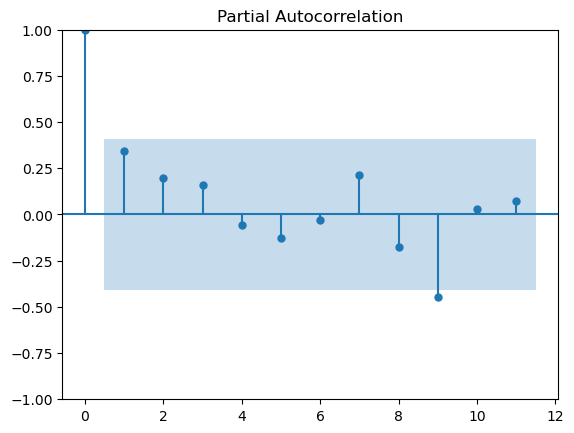

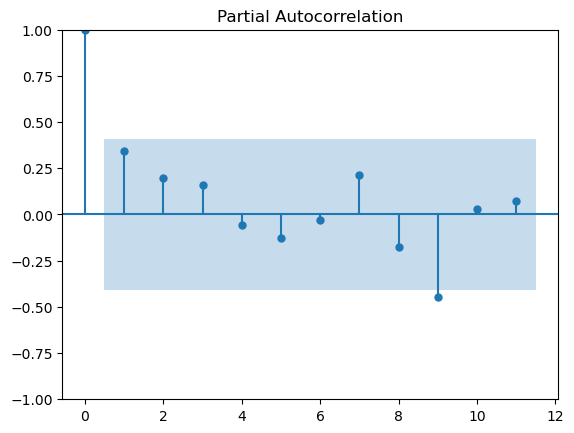

In [7]:
plot_pacf(jute['weighted_mean_production'])

In [11]:
from statsmodels.tsa.arima.model import ARIMA
jute['Crop_Year'] = pd.to_datetime(jute['Crop_Year'], format='%Y')  # Make sure there's a 'year' column
jute.set_index(pd.PeriodIndex(jute['Crop_Year'], freq='Y'), inplace=True)

# Extract the time series
ts = jute['weighted_mean_production']

# Fit ARIMA(3,2,1) model
model = ARIMA(ts, order=(3,2,1))
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast the next 5 years


                                  SARIMAX Results                                   
Dep. Variable:     weighted_mean_production   No. Observations:                   23
Model:                       ARIMA(3, 2, 1)   Log Likelihood                -285.199
Date:                      Thu, 10 Apr 2025   AIC                            580.398
Time:                              13:52:46   BIC                            585.621
Sample:                          12-31-1997   HQIC                           581.531
                               - 12-31-2019                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5696      0.345     -1.652      0.098      -1.245       0.106
ar.L2         -0.4645      0.195     -2.379      0.017      -0.847      -0.082
ar.L

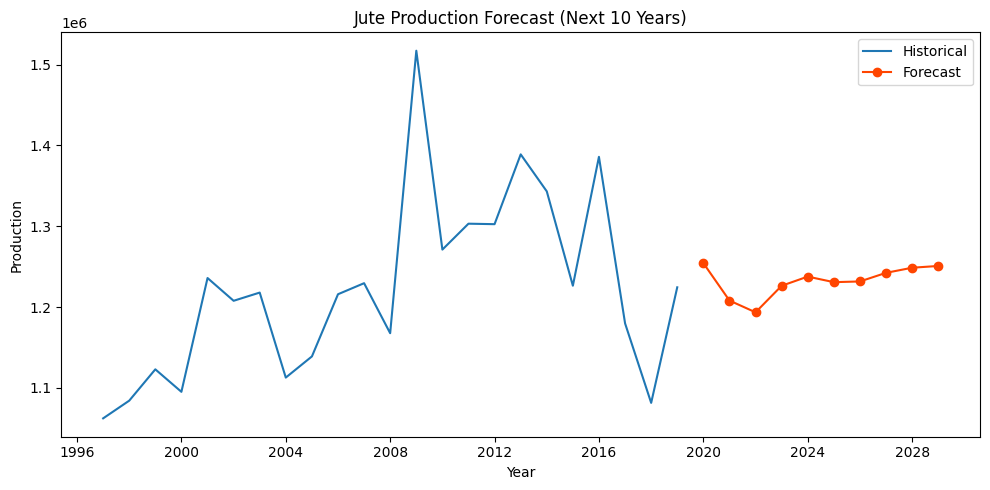

In [12]:
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.period_range(start=ts.index[-1] + 1, periods=forecast_steps, freq='Y')

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(ts.index.to_timestamp(), ts, label="Historical")
plt.plot(forecast_index.to_timestamp(), forecast.predicted_mean, label="Forecast", marker='o', color='orangered')
plt.title("Jute Production Forecast (Next 10 Years)")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.tight_layout()
plt.show()


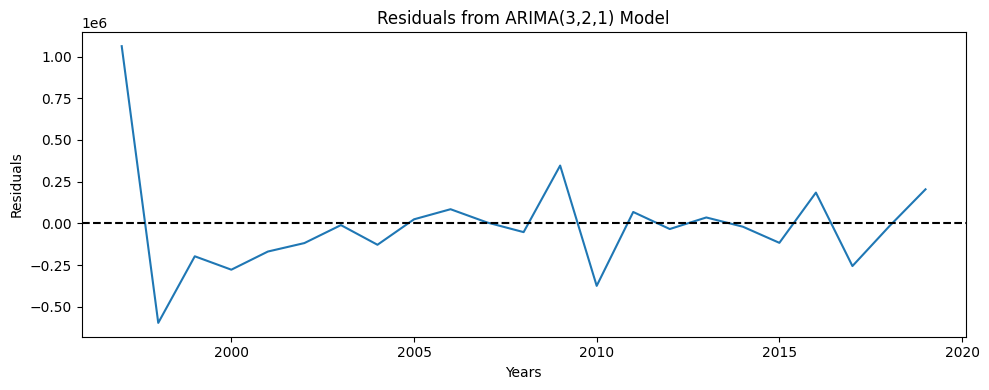

In [13]:
residuals=model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(jute['years'],residuals.values)  # Use .values to avoid index issues
plt.title("Residuals from ARIMA(3,2,1) Model")
plt.xlabel("Years")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()
